In [1]:
import numpy as np
import os
import pandas as pd

# Load the .npz file
with np.load('cifar4-train.npz') as data:
    cifar4_data = dict(data.items())

print('It is a dictionary with keys:', list(cifar4_data.keys()))

It is a dictionary with keys: ['pixels', 'overfeat', 'labels', 'names', 'allow_pickle']


In [2]:
X=cifar4_data['overfeat']
y=cifar4_data['labels']
P=cifar4_data['pixels']


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


# Split data into train/test sets
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [4]:
# Split data into train/test sets
P_tr, P_te= train_test_split(
    P, test_size=0.2, random_state=0)



In [5]:
# Create a pipeline with the PCA
pipelogreg = Pipeline([
     ('PCA', PCA()),
        ('logreg', LogisticRegression()
        )])


# Fit to train data
pipelogreg.fit(X_tr, y_tr)

# Evaluate on test set
accuracy = pipelogreg.score(X_tr, y_tr)
print('Accuracy: {:.3f}'.format(accuracy))

Accuracy: 1.000


In [6]:
pipelogreg.get_params().keys()

dict_keys(['memory', 'steps', 'PCA', 'logreg', 'PCA__copy', 'PCA__iterated_power', 'PCA__n_components', 'PCA__random_state', 'PCA__svd_solver', 'PCA__tol', 'PCA__whiten', 'logreg__C', 'logreg__class_weight', 'logreg__dual', 'logreg__fit_intercept', 'logreg__intercept_scaling', 'logreg__max_iter', 'logreg__multi_class', 'logreg__n_jobs', 'logreg__penalty', 'logreg__random_state', 'logreg__solver', 'logreg__tol', 'logreg__verbose', 'logreg__warm_start'])

In [7]:
from sklearn.model_selection import KFold

# Create k-fold object
kfold = KFold(n_splits=5)


In [9]:
# to tune the regularization strenght I use the C parameter

from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import cross_validate

# Define a set of reasonable values
principal=[None,87]
C=[0.1,0.5,1,1.5,2,5,10,50,100]

# Define a grid of values
grid = ParameterGrid({
    'PCA__n_components': principal,
    'logreg__C': C,
    
})

test_scores_mean_logreg=[]
test_scores_std_logreg=[]
test_scores_param_logreg=[]


for params_dict in grid:
    # Set parameters
    pipelogreg.set_params(**params_dict)

    # Fit a k-NN classifier
    pipelogreg.fit(X_tr, y_tr)
    
    
    # Evaluate on test set
    #accuracy = pipeSVC.score(X_te, y_te)
    #print(params_dict)
    #print('Accuracy: {:.3f}'.format(accuracy))
    
    
    
    
    rf_scores_logreg=cross_validate(pipelogreg, X_tr, y_tr, cv=kfold)
    print(params_dict)
    print('SVM - mean test {:.3f}'.format(
    np.mean(rf_scores_logreg['test_score'])))
    print('SVM - mean test {:.3f}'.format(
    np.std(rf_scores_logreg['test_score'])))
    test_scores_mean_logreg.append(format(np.mean(rf_scores_logreg['test_score'])))
    test_scores_std_logreg.append(format(np.std(rf_scores_logreg['test_score'])))
    test_scores_param_logreg.append(params_dict)
    

{'PCA__n_components': None, 'logreg__C': 0.1}
SVM - mean test 0.833
SVM - mean test 0.013
{'PCA__n_components': None, 'logreg__C': 0.5}
SVM - mean test 0.822
SVM - mean test 0.018
{'PCA__n_components': None, 'logreg__C': 1}
SVM - mean test 0.820
SVM - mean test 0.018
{'PCA__n_components': None, 'logreg__C': 1.5}
SVM - mean test 0.819
SVM - mean test 0.017
{'PCA__n_components': None, 'logreg__C': 2}
SVM - mean test 0.818
SVM - mean test 0.017
{'PCA__n_components': None, 'logreg__C': 5}
SVM - mean test 0.817
SVM - mean test 0.017
{'PCA__n_components': None, 'logreg__C': 10}
SVM - mean test 0.814
SVM - mean test 0.018
{'PCA__n_components': None, 'logreg__C': 50}
SVM - mean test 0.811
SVM - mean test 0.017
{'PCA__n_components': None, 'logreg__C': 100}
SVM - mean test 0.812
SVM - mean test 0.018
{'PCA__n_components': 87, 'logreg__C': 0.1}
SVM - mean test 0.820
SVM - mean test 0.011
{'PCA__n_components': 87, 'logreg__C': 0.5}
SVM - mean test 0.822
SVM - mean test 0.011
{'PCA__n_components': 

In [10]:
logreg_res=pd.DataFrame(test_scores_param_logreg)
df=pd.DataFrame(test_scores_mean_logreg, columns=['Mean'])
logreg_res=pd.concat([logreg_res,df], axis=1, )
df2=pd.DataFrame(test_scores_std_logreg,columns=['Std Dev'])
logreg_res=pd.concat([logreg_res,df2], axis=1)

logreg_res.sort_values(by='Mean', ascending=False)

,PCA__n_components,logreg__C,Mean,Std Dev
0,NaN,0.1,0.8332499999999999,0.01305277748220659
16,87.0,50.0,0.82325,0.010741275529470422
11,87.0,1.0,0.8227499999999999,0.010706306552681932
15,87.0,10.0,0.82225,0.010470195795685965
10,87.0,0.5,0.8219999999999998,0.010741275529470401
12,87.0,1.5,0.8217500000000001,0.010914439976471528
1,NaN,0.5,0.82175,0.018124568960391833
13,87.0,2.0,0.8205,0.00937416662962633
17,87.0,100.0,0.8205,0.010111874208078332
9,87.0,0.1,0.82025,0.011022703842524293


In [11]:
pipelogreg = Pipeline([
     ('PCA', PCA(n_components=None)),
        ('logreg', LogisticRegression(C=0.1)
        )])


# Fit to train data
pipelogreg.fit(X_tr, y_tr)

# Evaluate on test set
accuracy = pipelogreg.score(X_te, y_te)
print('Accuracy: {:.3f}'.format(accuracy))

Accuracy: 0.828


### The results on the test are aligned with the training

# Review specific imagines

Picture # 0


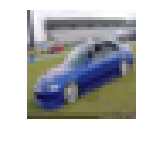

Picture # 1


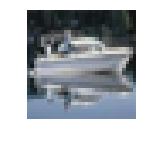

Picture # 2


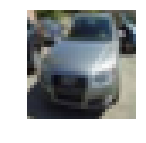

Picture # 3


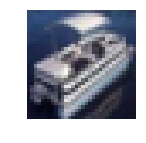

Picture # 4


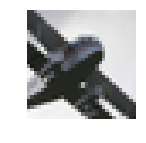

Picture # 5


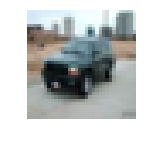

Picture # 6


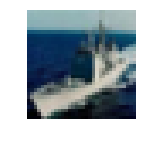

Picture # 7


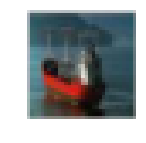

Picture # 8


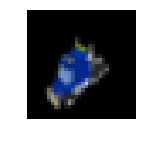

Picture # 9


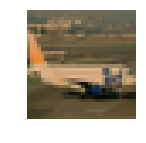

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

# Function to plot the i-th image from some X/y arrays
def show_image(idx, X, y):
    # Print its label
    label = y[idx]
    
    
    
    # Get image pixels
    flat_img = X[idx] # has shape (3072,)
    
    # Reshape the "flat vector" into a 32x32x3 array 
    img = flat_img.reshape(32, 32, 3)
    
    # The imshow() function expects pixel values
    # between 0 and 1 when the data type is float.
    img = img/255 # Rescale [0,255] values to [0,1]
    
    # Plot the imag
    plt.figure(figsize=(2,2)) # 2 by 2 figure (in inches)
    plt.imshow(img)
    plt.axis('off') # Hide the x- and y-axis
    plt.show()
i=0 

for i in range(10):
    print('Picture #',i)
    show_image(i,P_te , y_te )

In [13]:
df_list_overfeat=pd.DataFrame(X_te).head(10)

In [14]:
df_list_overfeat

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,4.074219,0.448242,0.981934,0.600586,0.147949,0.032654,-0.903320,-0.449463,-1.786133,-0.157104,...,1.311523,-1.329102,-1.107422,-0.695312,-2.037109,-1.163086,0.305664,-1.410156,1.251953,-0.618164
1,1.599609,-0.134155,0.183228,-0.589844,-0.876465,-0.122375,-0.903320,-0.562500,0.509766,1.099609,...,0.973145,-1.235352,-0.020996,-1.283203,-2.310547,-1.519531,-1.378906,-1.290039,0.959473,-0.590820
2,2.761719,0.418701,1.693359,-1.107422,-0.644531,1.215820,-0.795410,-1.024414,-1.433594,0.107666,...,1.920898,-2.083984,1.467773,-0.192505,-2.873047,-1.083984,-0.799805,-2.486328,2.712891,0.239624
3,4.218750,-1.310547,1.177734,1.957031,-0.984863,0.626465,0.022751,-1.291016,0.531738,-0.274414,...,1.219727,1.011719,0.436523,-1.833984,-2.617188,-2.974609,-1.174805,0.060760,0.799805,-1.385742
4,5.281250,-0.868164,-1.562500,3.779297,-1.180664,-1.861328,-0.255371,-1.781250,-3.552734,-1.709961,...,0.478516,-1.299805,-0.400391,-0.716309,-3.289062,-1.982422,-1.214844,-0.696289,0.612305,-2.925781
5,3.162109,0.028610,1.078125,-0.581055,-0.048218,-0.862793,-1.470703,-0.810547,-1.860352,-0.391113,...,0.919922,-0.979004,-1.116211,0.248413,-2.554688,-1.200195,-0.668457,-1.555664,1.531250,-0.068604
6,3.255859,-0.542969,0.470459,0.720215,0.875000,1.558594,-0.677246,-1.102539,-0.296631,1.235352,...,0.169556,-0.353027,1.124023,0.296387,-2.994141,-0.528320,-2.433594,0.882324,0.511230,-1.385742
7,3.982422,0.043213,0.015961,0.560547,-0.462402,-0.933105,-0.664062,-1.018555,-0.346436,0.199707,...,1.856445,-0.085205,0.783203,0.062012,-2.398438,-1.344727,0.347412,-1.344727,0.094482,-0.954590
8,1.823242,1.109375,0.865234,-0.340088,2.851562,1.240234,-0.390381,0.627930,-0.268799,-0.574219,...,2.261719,0.644043,1.051758,0.293213,-2.171875,-0.729980,-1.210938,-0.873535,0.174805,-0.526367
9,0.814941,-0.563965,1.099609,-0.876465,0.016678,-0.380371,-2.365234,-0.710449,-0.772461,0.509277,...,1.124023,-0.268555,-0.436768,-0.494141,-3.746094,-1.233398,1.017578,-1.608398,0.479736,-1.564453


In [15]:
prediction=pd.DataFrame(pipelogreg.predict_proba(df_list_overfeat)*100, columns=['Truck','Car','Airplane','Ship'])

In [17]:
prediction

,Truck,Car,Airplane,Ship
0,0.000767,94.774819,0.100842,5.123572
1,0.078747,65.677076,0.870667,33.373509
2,7.229128,91.679987,0.019455,1.071429
3,0.011228,0.024529,0.006360,99.957883
4,0.344442,3.940843,95.714651,0.000064
5,37.850405,11.352885,0.577287,50.219423
6,0.011681,0.000832,14.029706,85.957780
7,0.051999,14.751045,0.059126,85.137830
8,2.950739,7.889873,89.010510,0.148878
9,0.040951,4.969514,88.228320,6.761215


### I get an accuracy of 70% which is in line with what I should have got (80%) considering the few items selected